Chapter 04

# 非线性回归
Book_7《机器学习》 | 鸢尾花书：从加减乘除到机器学习

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import FunctionTransformer

In [2]:
p = plt.rcParams
p["font.sans-serif"] = ["Roboto"]
p["font.weight"] = "light"
p["ytick.minor.visible"] = True
p["xtick.minor.visible"] = True
p["axes.grid"] = True
p["grid.color"] = "0.5"
p["grid.linewidth"] = 0.5

In [3]:
np.random.seed(123)

def func_exp(x, a, b, c):
    # exponential function
    
    return a * np.exp(b * x) + c


def func_log(x, a, b, c):
    # log function
    
    return a * np.log(b * x) + c


def generate_data(func, *args, noise=0):
    
    # generate data
    xs = np.linspace(1, 6, 50)
    ys = func(xs, *args)
    noise = noise * np.random.normal(size=len(xs)) + noise
    xs = xs.reshape(-1, 1) 
    ys = (ys + noise).reshape(-1, 1)
    return xs, ys

## Fit exponential data

In [4]:
# Generate data
x_samp, y_samp = generate_data(func_exp, 2.5, 1.2, 0.7, noise=10)

transformer = FunctionTransformer(np.log, validate=True)

y_trans = transformer.fit_transform(y_samp)

## Regression

In [5]:
regressor = LinearRegression()
results = regressor.fit(x_samp, y_trans)
model = results.predict
y_fit = model(x_samp)

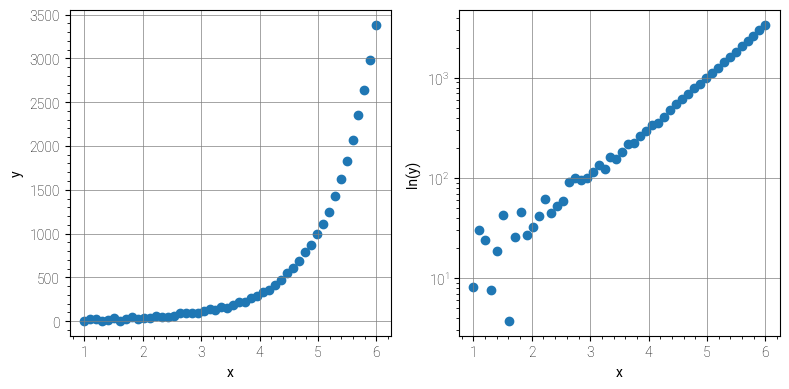

In [6]:
plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.scatter(x_samp, y_samp)
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.tight_layout()

plt.subplot(122)
plt.scatter(x_samp, y_samp)
plt.yscale('log')
plt.ylabel('ln(y)')
plt.xlabel('x')
plt.grid(True)
plt.tight_layout()

## fitted data

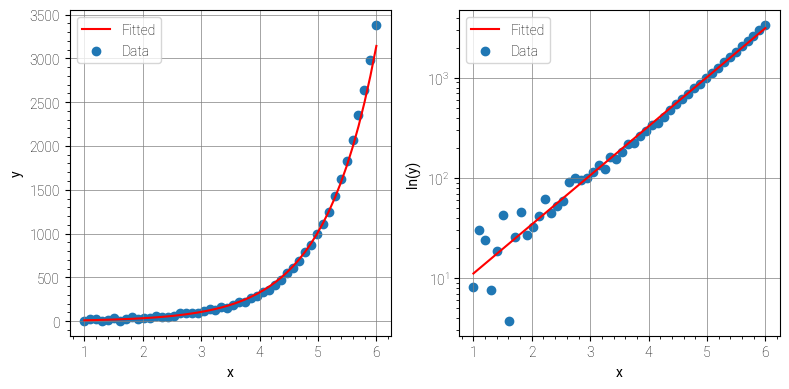

In [7]:
plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.scatter(x_samp, y_samp, label = 'Data')
plt.plot(x_samp, np.exp(y_fit), "r", label="Fitted")
plt.legend()
plt.ylabel('y')
plt.xlabel('x')
plt.grid(True)
plt.tight_layout()

plt.subplot(122)
plt.scatter(x_samp, y_samp, label = 'Data')
plt.plot(x_samp, np.exp(y_fit), "r", label="Fitted")
plt.yscale('log')
plt.ylabel('ln(y)')
plt.xlabel('x')
plt.legend()
plt.grid(True)
plt.tight_layout()

In [8]:
## Fit log data

## Data

In [9]:
x_samp, y_samp = generate_data(func_log, 2.5, 1.2, 0.7, noise=0.3)
x_trans = transformer.fit_transform(x_samp)

## Regression

In [10]:
regressor = LinearRegression()
results = regressor.fit(x_trans, y_samp)
model = results.predict
y_fit = model(x_trans)

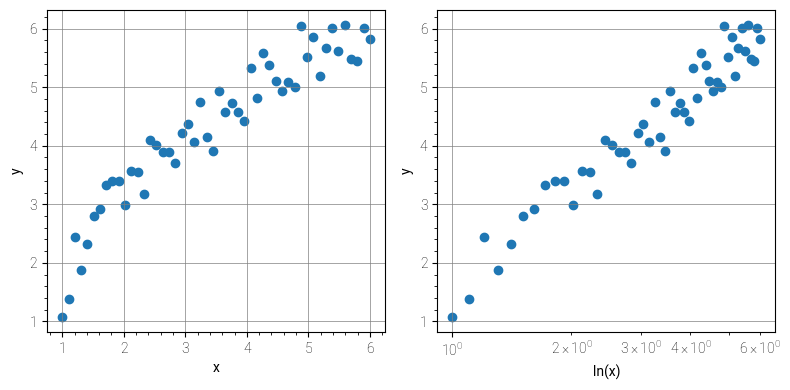

In [11]:
plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.scatter(x_samp, y_samp)
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.tight_layout()

plt.subplot(122)
plt.scatter(x_samp, y_samp)
plt.xscale('log')
plt.xlabel('ln(x)')
plt.ylabel('y')
plt.grid(True)
plt.tight_layout()

## fitted data

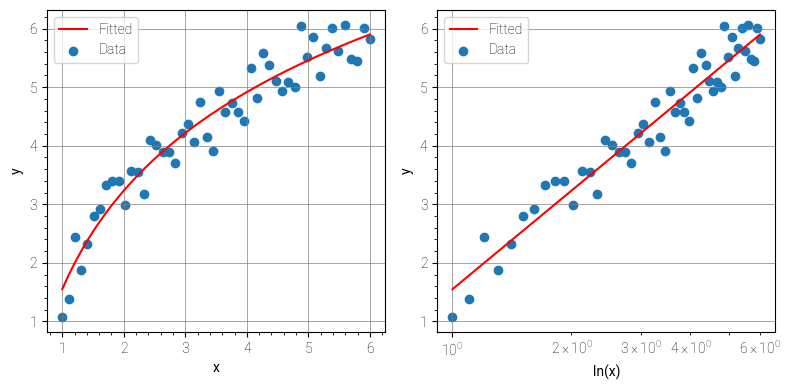

In [12]:
plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.scatter(x_samp, y_samp, label = 'Data')
plt.plot(x_samp, y_fit, "r", label="Fitted")
plt.legend()
plt.ylabel('y')
plt.xlabel('x')
plt.grid(True)
plt.tight_layout()

plt.subplot(122)
plt.scatter(x_samp, y_samp, label = 'Data')
plt.plot(x_samp, y_fit, "r", label="Fitted")
plt.xscale('log')
plt.xlabel('ln(x)')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.tight_layout()